<a href="https://colab.research.google.com/github/vaibhaVkumar28/Burnt_calorie_detector/blob/main/Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
labels_csv=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/train.csv')
print(labels_csv.describe())
labels_csv.head()

         diagnosis
count  3662.000000
mean      1.126980
std       1.298409
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       4.000000


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
labels_csv['ID']=labels_csv.index
column_order = ['ID'] + [col for col in labels_csv.columns if col != 'ID']
labels_csv = labels_csv[column_order]
labels_csv.head()

,ID,id_code,diagnosis
0,0,000c1434d8d7,2
1,1,001639a390f0,4
2,2,0024cdab0c1e,1
3,3,002c21358ce6,0
4,4,005b95c28852,0


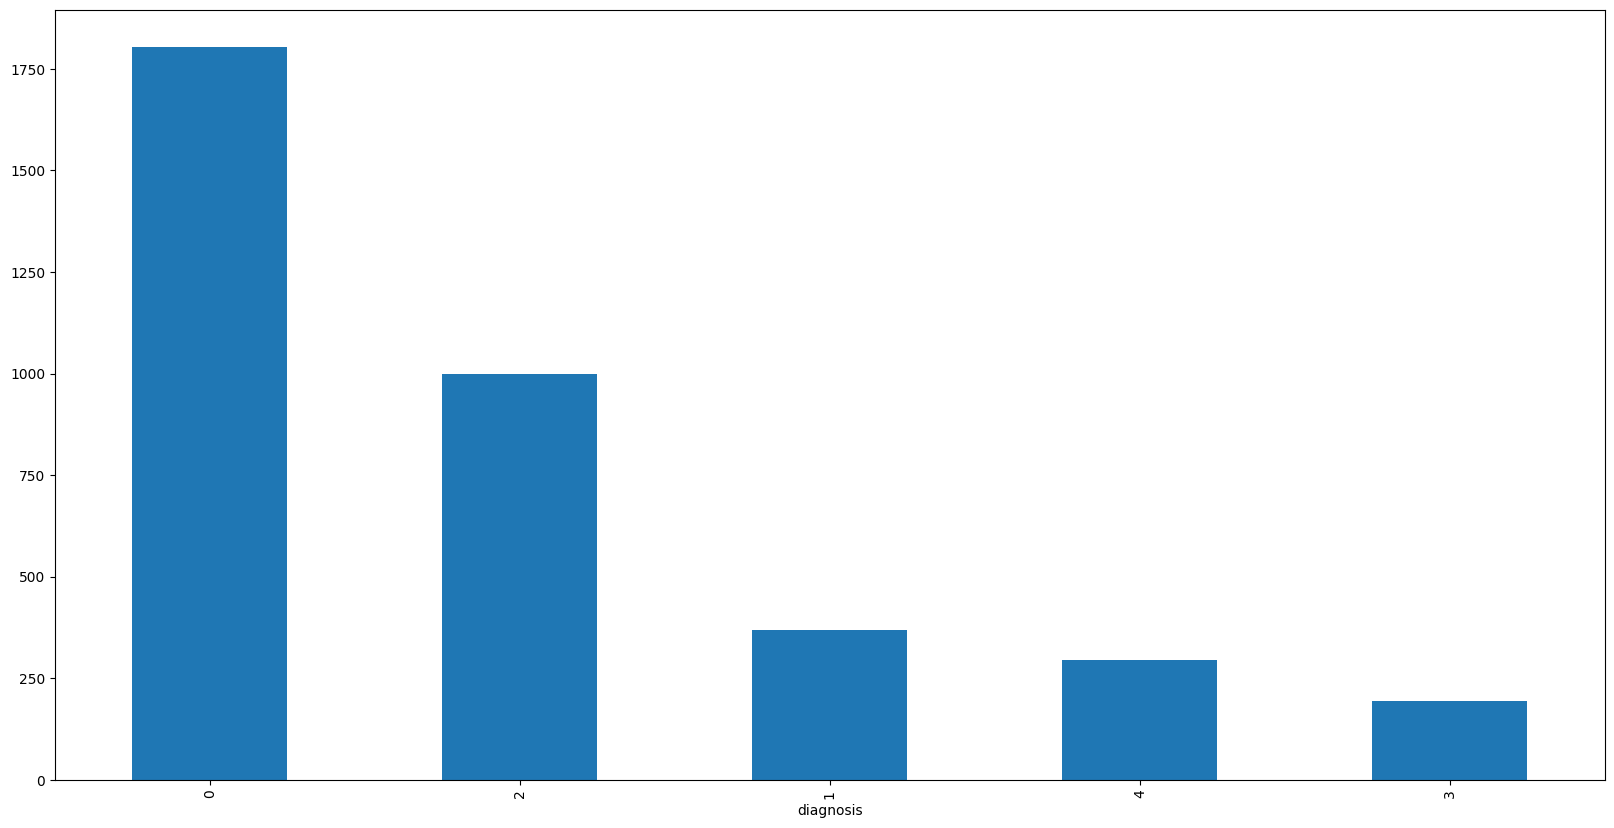

In [5]:
labels_csv['diagnosis'].value_counts().plot.bar(figsize=(20,10));

In [6]:
labels_csv['diagnosis'].value_counts().median()

370.0

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
import os
import math # Use math.ceil if needed for steps calculation later

# --- Define Your Paths ---
base_dir = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/'
labels_path = base_dir + 'train.csv'

# The folder that CONTAINS the class folders (Mild, Moderate, etc.)
# Based on your file explorer, this is the root for all images:
original_image_root = base_dir + 'colored_images/colored_images/'

# --- Define New Destination Folders (Must not exist yet) ---
tv_pool_dir = base_dir + 'colored_images/colored_images_TV_Pool/'
test_dir = base_dir + 'colored_images/colored_images_Test/'

# Ensure destination root folders exist
os.makedirs(tv_pool_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# --- FIX 1: Diagnosis Mapping (Numerical 'level' to Worded Folder Name) ---
# Create a mapping dictionary for the numerical level in the CSV to the physical folder name
diagnosis_map = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR'
}

In [8]:
# Load the labels
df = pd.read_csv(labels_path)

# --- FIX 2 & 3: Rename Columns and Add File Extension ---
# Rename 'level' to 'diagnosis' for clarity and map it to the folder name
df['diagnosis_folder'] = df['diagnosis'].map(diagnosis_map)
# Add the correct file extension
df['image_file'] = df['id_code'].astype(str) + '.png'

# Perform a stratified split: 80% for Train/Validation, 20% for Test
train_val_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    # Stratify using the original 'level' column to maintain balance
    stratify=df['diagnosis']
)

print(f"Total Samples: {len(df)}")
print(f"Train/Validation Pool: {len(train_val_df)} samples")
print(f"Test Set: {len(test_df)} samples")

Total Samples: 3662
Train/Validation Pool: 2929 samples
Test Set: 733 samples


In [25]:
import os
import shutil
import random
from tqdm.notebook import tqdm # Progress bar

# --- 1. CONFIGURATION ---
base_dir = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/'

# CORRECTED SOURCE PATH (Removed the double 'colored_images')
source_root = base_dir + 'colored_images/'

# Destinations
tv_pool_dir = base_dir + 'colored_images/colored_images_TV_Pool/'
test_dir = base_dir + 'colored_images/colored_images_Test/'

classes = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

# --- 2. THE SPLIT LOGIC ---
print(f"🚀 Starting Split from: {source_root}")

for class_name in classes:
    # Source path for this specific class (e.g., .../colored_images/Mild)
    class_source = os.path.join(source_root, class_name)

    # Destination paths
    class_tv_dest = os.path.join(tv_pool_dir, class_name)
    class_test_dest = os.path.join(test_dir, class_name)

    # Create destination subfolders
    os.makedirs(class_tv_dest, exist_ok=True)
    os.makedirs(class_test_dest, exist_ok=True)

    # Get list of images
    if os.path.exists(class_source):
        images = [f for f in os.listdir(class_source) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Shuffle to ensure random split
        random.seed(42)
        random.shuffle(images)

        # Calculate split index (80% for TV Pool, 20% for Test)
        split_idx = int(len(images) * 0.8)
        tv_images = images[:split_idx]
        test_images = images[split_idx:]

        print(f"   Processing {class_name}: {len(images)} total -> {len(tv_images)} Train/Val, {len(test_images)} Test")

        # Copy files (Using TQDM for progress bar)
        for img in tqdm(tv_images, desc=f"Copying {class_name} to TV Pool", leave=False):
            src = os.path.join(class_source, img)
            dst = os.path.join(class_tv_dest, img)
            if not os.path.exists(dst): # Don't overwrite if exists
                shutil.copy(src, dst)

        for img in tqdm(test_images, desc=f"Copying {class_name} to Test", leave=False):
            src = os.path.join(class_source, img)
            dst = os.path.join(class_test_dest, img)
            if not os.path.exists(dst):
                shutil.copy(src, dst)
    else:
        print(f"⚠️ Warning: Source folder not found for {class_name}")

🚀 Starting Split from: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images/
   Processing Mild: 370 total -> 296 Train/Val, 74 Test


Copying Mild to TV Pool:   0%|          | 0/296 [00:00<?, ?it/s]

Copying Mild to Test:   0%|          | 0/74 [00:00<?, ?it/s]

   Processing Moderate: 999 total -> 799 Train/Val, 200 Test


Copying Moderate to TV Pool:   0%|          | 0/799 [00:00<?, ?it/s]

Copying Moderate to Test:   0%|          | 0/200 [00:00<?, ?it/s]

   Processing No_DR: 1811 total -> 1448 Train/Val, 363 Test


Copying No_DR to TV Pool:   0%|          | 0/1448 [00:00<?, ?it/s]

Copying No_DR to Test:   0%|          | 0/363 [00:00<?, ?it/s]

   Processing Proliferate_DR: 295 total -> 236 Train/Val, 59 Test


Copying Proliferate_DR to TV Pool:   0%|          | 0/236 [00:00<?, ?it/s]

Copying Proliferate_DR to Test:   0%|          | 0/59 [00:00<?, ?it/s]

   Processing Severe: 193 total -> 154 Train/Val, 39 Test


Copying Severe to TV Pool:   0%|          | 0/154 [00:00<?, ?it/s]

Copying Severe to Test:   0%|          | 0/39 [00:00<?, ?it/s]


✅ Split Complete! Now your generators should find images.


In [10]:
import pandas as pd

# Load the CSV file
df_labels = pd.read_csv(labels_path)

# Display the first few rows to understand the structure
print("DataFrame Structure:")
df_labels.head()


DataFrame Structure:


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [11]:
# Display the distribution of classes
print("\nClass Distribution:")
print(df_labels['diagnosis'].value_counts())


Class Distribution:
diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64


In [31]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input # Import ResNet-specific preprocessing

# --- Define Final Paths ---
base_dir = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images/'
# Path to the 80% pool (for Train/Validation split using validation_split=0.2)
image_tv_pool_dir = base_dir + 'colored_images_TV_Pool/'
# Path to the 20% dedicated Test Set
test_dir = base_dir + 'colored_images_Test/'

# --- Configuration ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
# Replace this with your actual root directory path
image_root_dir = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images'
# --- 1. Custom CLAHE Preprocessing Function ---
def apply_clahe(img):
    """Applies CLAHE and then runs ResNet-specific preprocessing."""

    # Convert RGB to LAB color space for CLAHE
    lab = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to the L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge channels and convert back to RGB
    limg = cv2.merge((cl, a, b))
    final_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # Apply ResNet's specific input preprocessing (mean subtraction, etc.)
    return preprocess_input(final_img.astype(np.float32))

In [29]:
# --- 2. Training Data Generator (Augmentation + CLAHE + ResNet Preprocessing) ---
# NOTE: Removed 'rescale=1./255' because CLAHE function handles normalization via preprocess_input
train_datagen = ImageDataGenerator(
    # --- Geometric Augmentations ---
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,

    # --- Custom Preprocessing ---
    preprocessing_function=apply_clahe,
    validation_split=0.2
)

# --- 3. Validation Data Generator (CLAHE + ResNet Preprocessing ONLY) ---
validation_datagen = ImageDataGenerator(
    preprocessing_function=apply_clahe,
    validation_split=0.2
)

# --- 4. Training Data Loader ---
train_generator = train_datagen.flow_from_directory(
    image_tv_pool_dir,
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical',
    subset='training', seed=SEED
)

# --- Validation Data Loader (Flow from TV Pool, subset='validation') ---
validation_generator = validation_datagen.flow_from_directory(
    image_tv_pool_dir,
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical',
    subset='validation', seed=SEED
)

# --- 2. Test Data Generator (New Generator) ---
# NO augmentation, NO validation_split, SHUFFLE=False
test_datagen = ImageDataGenerator(
    preprocessing_function=apply_clahe
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical',
    shuffle=False # Critical for final evaluation!
)

# Calculate final steps for training and testing
train_steps = math.ceil(train_generator.samples / BATCH_SIZE)
validation_steps = math.ceil(validation_generator.samples / BATCH_SIZE)
test_steps = math.ceil(test_generator.samples / BATCH_SIZE)

print(f"Train samples: {train_generator.samples}, Validation samples: {validation_generator.samples}, Test samples: {test_generator.samples}")

Found 2349 images belonging to 5 classes.
Found 584 images belonging to 5 classes.
Found 735 images belonging to 5 classes.
Train samples: 2349, Validation samples: 584, Test samples: 735


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Configuration ---
IMG_SIZE = (224, 224) # Standard input size for many pre-trained models
BATCH_SIZE = 32
SEED = 42

# --- Data Augmentation/Rescaling ---
# It's essential to normalize the pixel values (usually by dividing by 255.0)
datagen = ImageDataGenerator(
    rescale=1./255, # Rescale pixel values to the range [0, 1]
    validation_split=0.2 # Use 20% of data for validation
    # Add other augmentation parameters here if needed (rotation, zoom, etc.)
)

# --- Training Data Generator ---
train_generator = datagen.flow_from_directory(
    image_root_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Use 'categorical' for multi-class classification
    subset='training',
    seed=SEED
)

# --- Validation Data Generator ---
validation_generator = datagen.flow_from_directory(
    image_root_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)

Found 2936 images belonging to 7 classes.
Found 732 images belonging to 7 classes.


In [30]:
# 🧠 Model Definition and Compilation ##

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load ResNet50 Base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
#Add custom classification layers (make sure to replace 5 with train_generator.num_classes)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)



In [33]:
# Construct the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,691,013 (98.00 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks (Make sure to run the cell where these were defined earlier)

# --- FIX: Change the extension to .weights.h5 ---
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/best_resnet_weights.weights.h5'
# ---------------------------------------------

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True,
    verbose=1
)
callbacks_list = [model_checkpoint_callback, early_stopping]



In [ ]:
# # --- Training Execution ---
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_steps,
#     epochs=100, # Set a large number, EarlyStopping will halt it early
#     validation_data=validation_generator,
#     validation_steps=validation_steps,
#     callbacks=callbacks_list,
#     verbose=1
# )

In [ ]:
# The save path must point to your Google Drive to be permanent
# save_path = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/resnet_dr2_model.keras'

In [ ]:
# try:
#     # Save the model in the recommended Keras Native Format (.keras)
#     model.save(save_path)
#     print(f"✅ Model saved successfully to: {save_path}")

# except Exception as e:
#     print(f"❌ Error saving model: {e}")
#     # Fallback to the older H5 format if the Keras format encounters issues
#     h5_save_path = save_path.replace('.keras', '.h5')
#     model.save(h5_save_path)
#     print(f"✅ Model saved successfully in H5 format to: {h5_save_path}")

In [40]:
import tensorflow as tf

# Define the path to your saved model file or directory
# Replace 'path/to/your/saved_model' with the actual location
model_path = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/resnet_dr2_model.keras'

# Load the entire model, including its architecture, weights,
# optimizer state, and loss/metrics configurations.
try:
    loaded_model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")

# Display the model summary to confirm it's loaded correctly
loaded_model.summary()

Model loaded successfully!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,742,673 (102.02 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,103,308 (8.02 MB)

Loading model...
Using image folder: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/diabetic retinopathy/colored_images/colored_images_Test
Loading images...
Found 7026 files belonging to 5 classes.
Running predictions...
220/220 ━━━━━━━━━━━━━━━━━━━━ 1160s 5s/step

Classification Report:
                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00       489
      Moderate       0.21      0.01      0.02      1058
         No_DR       0.74      1.00      0.85      5162
Proliferate_DR       0.50      0.03      0.05       142
        Severe       0.00      0.00      0.00       175

      accuracy                           0.73      7026
     macro avg       0.29      0.21      0.18      7026
  weighted avg       0.58      0.73      0.63      7026



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


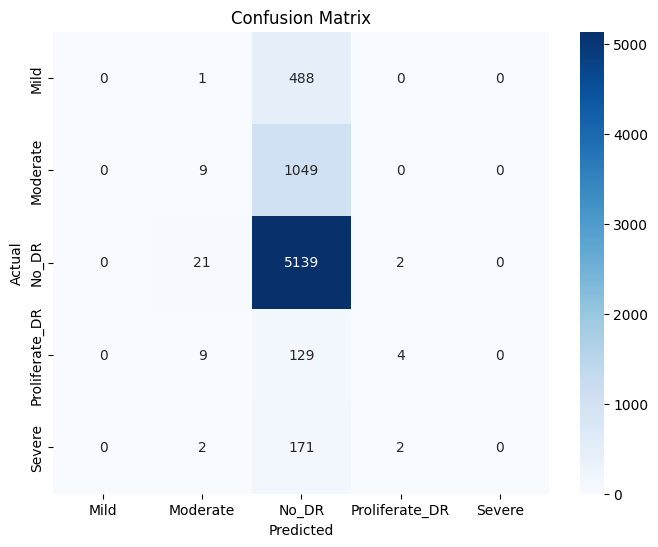

In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load the Model
print("Loading model...")
model = tf.keras.models.load_model(model_path)


DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/diabetic retinopathy/colored_images/colored_images_Test'

# Verify it exists before running
if not os.path.exists(DATA_DIR):
    # Fallback: If you are using the unzipped version in Colab temp storage
    DATA_DIR = '/content/colored_images_Test'

print(f"Using image folder: {DATA_DIR}")
# 2. Load the Dataset
print("Loading images...")
# Note: We use the DATA_DIR we defined earlier
test_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    image_size=(224, 224), # Ensure this matches your training size
    batch_size=32,
    shuffle=False # Important for evaluation
)

# 3. Predict
print("Running predictions...")
predictions = model.predict(test_ds)
y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = np.concatenate([y for x, y in test_ds], axis=0)

# 4. Show Results
class_names = test_ds.class_names
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

# 1. Load a small sample (1 batch)
test_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True # Shuffle so we get a mix of classes, not just one type
)

# Grab the first batch of 32 images
for images, labels in test_ds.take(1):
    sample_images = images
    sample_labels = labels
    break

print(f"\n--- DIAGNOSTIC TEST (Checking 3 Preprocessing Methods) ---")

# METHOD A: RAW (0-255)
# (Use this if you had a Rescaling layer INSIDE your model)
print("\nTest A: Raw Images (0-255)")
preds_a = model.predict(sample_images, verbose=0)
conf_a = np.max(preds_a, axis=1).mean()
print(f"Average Confidence: {conf_a:.2%} (Higher is better)")
print(f"Predicted Class Distribution: {np.bincount(np.argmax(preds_a, axis=1), minlength=5)}")

# METHOD B: NORMALIZED (0-1)
# (Use this if you manually divided by 255 during training)
print("\nTest B: Normalized Images (1/255)")
preds_b = model.predict(sample_images / 255.0, verbose=0)
conf_b = np.max(preds_b, axis=1).mean()
print(f"Average Confidence: {conf_b:.2%} (Higher is better)")
print(f"Predicted Class Distribution: {np.bincount(np.argmax(preds_b, axis=1), minlength=5)}")

# METHOD C: RESNET STANDARD (preprocess_input)
# (Use this if you used transfer learning correctly without rescaling)
print("\nTest C: ResNet50 Preprocessing (Mean Subtraction)")
preds_c = model.predict(preprocess_input(np.copy(sample_images)), verbose=0)
conf_c = np.max(preds_c, axis=1).mean()
print(f"Average Confidence: {conf_c:.2%} (Higher is better)")
print(f"Predicted Class Distribution: {np.bincount(np.argmax(preds_c, axis=1), minlength=5)}")

print("\n------------------------------------------------")

Found 7026 files belonging to 5 classes.

--- DIAGNOSTIC TEST (Checking 3 Preprocessing Methods) ---

Test A: Raw Images (0-255)
Average Confidence: 95.87% (Higher is better)
Predicted Class Distribution: [ 0  0 32  0  0]

Test B: Normalized Images (1/255)
Average Confidence: 58.94% (Higher is better)
Predicted Class Distribution: [ 0  0 32  0  0]

Test C: ResNet50 Preprocessing (Mean Subtraction)
Average Confidence: 89.79% (Higher is better)
Predicted Class Distribution: [ 0  1 31  0  0]

------------------------------------------------


In [ ]:
import shutil
import os
import tensorflow as tf

# 1. Define your Test Directory (Update this path if it's different!)
# Based on your screenshot, it looks like this:
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/diabetic retinopathy/colored_images/colored_images_Test'

# OR if you are using the unzipped version in /content/:
# TEST_DIR = '/content/colored_images_Test'

print(f"Scanning: {TEST_DIR}")

# 2. Delete the unwanted numbered folders
unwanted_folders = ['0', '1', '2', '3', '4']

for folder in unwanted_folders:
    folder_path = os.path.join(TEST_DIR, folder)
    if os.path.exists(folder_path):
        print(f"Removing unwanted folder: {folder}...")
        try:
            shutil.rmtree(folder_path) # Deletes the folder and its contents
        except Exception as e:
            print(f"Could not delete {folder}: {e}")
    else:
        print(f"Folder {folder} not found (already clean).")

# 3. Reload the Dataset (Now it should only see 5 classes)
print("\nReloading Dataset...")
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

print(f"\n✅ Classes found: {test_ds.class_names}")
# VERIFY: This list MUST contain ONLY: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

Scanning: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/diabetic retinopathy/colored_images/colored_images_Test
Removing unwanted folder: 0...
Removing unwanted folder: 1...
Removing unwanted folder: 2...
Removing unwanted folder: 3...
Removing unwanted folder: 4...

Reloading Dataset...
Found 7026 files belonging to 5 classes.

✅ Classes found: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. DEFINE PATHS (Matches your screenshot) ---
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000'
MODEL_PATH = os.path.join(BASE_PATH, 'final_model_resnet_3000.keras')
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images'

print(f"Model Path: {MODEL_PATH}")
print(f"Data Path: {DATA_DIR}")

Model Path: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/final_model_resnet_3000.keras
Data Path: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images


In [ ]:
def apply_clahe(img):
    """
    Applies CLAHE to the L-channel and then ResNet normalization.
    Must match training preprocessing exactly!
    """
    if img is None: return None

    # Convert to Uint8 for OpenCV
    img_uint8 = img.astype('uint8')

    # CLAHE Logic
    lab = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # ResNet Normalization
    return preprocess_input(final_img.astype(np.float32))

In [ ]:
# --- 1. Create Generator ---
print("Found the following classes:")
test_datagen = ImageDataGenerator(
    preprocessing_function=apply_clahe # <--- Applies your custom processing
)

# IMPORTANT: shuffle=False ensures predictions match the true labels order
test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# --- 2. Load Model ---
print(f"\nLoading model from {MODEL_PATH}...")
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

Found the following classes:
Found 3668 images belonging to 5 classes.

Loading model from /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/final_model_resnet_3000.keras...
✅ Model loaded successfully!


Running predictions (this may take a minute)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 938s 8s/step

--- Final Performance Report ---
                precision    recall  f1-score   support

          Mild       1.00      0.01      0.01       370
      Moderate       0.62      0.83      0.71       999
         No_DR       0.93      0.98      0.96      1811
Proliferate_DR       0.50      0.57      0.53       295
        Severe       0.69      0.31      0.42       193

      accuracy                           0.77      3668
     macro avg       0.75      0.54      0.53      3668
  weighted avg       0.81      0.77      0.73      3668



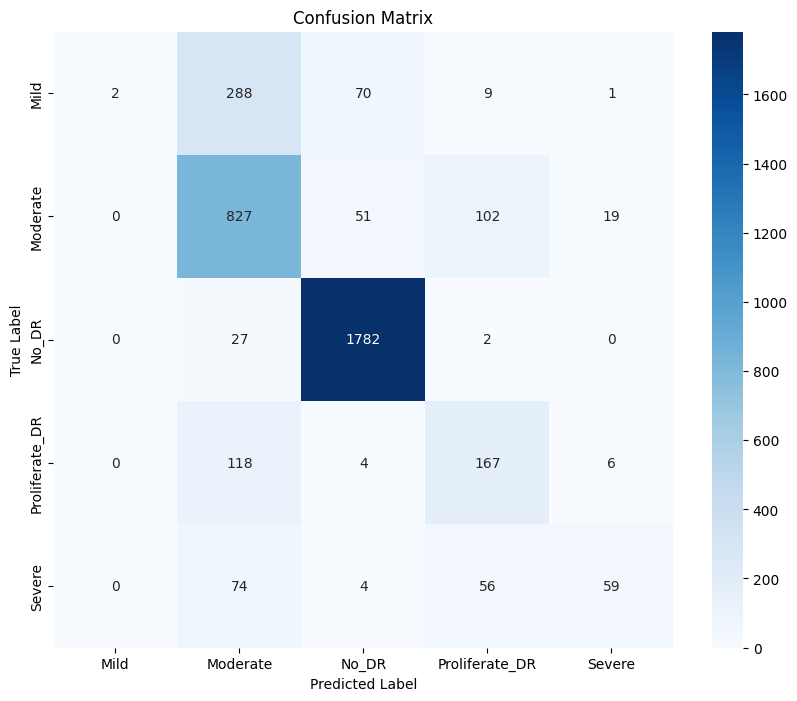

In [ ]:
# --- 1. Run Predictions ---
print("Running predictions (this may take a minute)...")
predictions = model.predict(test_generator, verbose=1)

# Convert probabilities (e.g., [0.1, 0.8, 0.1]) to class IDs (e.g., 1)
y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# --- 2. Classification Report ---
print("\n--- Final Performance Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# --- 3. Confusion Matrix ---
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.models import load_model
import os

# --- 0. Colab Specific: Mount Drive ---
# This will prompt you to authorize access to your Google Drive


# --- 1. Load Functions ---
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        loss = -y_true * (tf.pow((1 - y_pred), gamma)) * tf.math.log(y_pred)
        return tf.reduce_sum(loss, axis=-1)
    return focal_loss_fixed

# --- 2. Hybrid Builder Function ---
def build_feature_fusion_ensemble(model_path_a, model_path_b, input_shape=(300, 300, 3)):
    print(f"🔄 Loading Models...")

    # Load Model A (EfficientNet)
    model_a = load_model(model_path_a, custom_objects={'focal_loss_fixed': focal_loss()}, compile=False)
    model_a._name = "efficientnet_branch"

    # Load Model B (DenseNet)
    model_b = load_model(model_path_b, custom_objects={'focal_loss_fixed': focal_loss()}, compile=False)
    model_b._name = "densenet_branch"

    # Feature Extractors
    feature_model_a = models.Model(inputs=model_a.input, outputs=model_a.layers[-2].output, name="feat_ext_a")
    feature_model_b = models.Model(inputs=model_b.input, outputs=model_b.layers[-2].output, name="feat_ext_b")

    feature_model_a.trainable = False
    feature_model_b.trainable = False

    # --- SHARED INPUT (0-255 range) ---
    common_input = Input(shape=input_shape, name="hybrid_input")

    # --- BRANCH 1: EfficientNet (Happy with 0-255) ---
    features_a = feature_model_a(common_input)

    # --- BRANCH 2: DenseNet (Needs 512x512 AND 0-1 Scaling) ---
    # 1. Resize to 512
    x_dense = layers.Resizing(512, 512, name="resize_dense")(common_input)
    # 2. Scale down to 0-1
    x_dense = layers.Rescaling(1./255, name="scale_dense")(x_dense)
    features_b = feature_model_b(x_dense)

    # --- FUSION ---
    merged = layers.Concatenate()([features_a, features_b])

    # --- HEAD ---
    x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(merged)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(5, activation='softmax')(x)

    hybrid_model = models.Model(inputs=common_input, outputs=outputs, name="Hybrid_Fixed")
    return hybrid_model

# --- 3. Build & Compile ---

# ⚠️ UPDATE THESE PATHS to match where your files are in your Google Drive ⚠️
# Example: '/content/drive/MyDrive/Projects/Models/best_model_efficientnet_tta.keras'
EFFNET_PATH = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/best_model_efficientnet_finetuned.keras'
DENSENET_PATH = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/best_model_DenseNet_stage2.keras'

# Check if files exist before running to avoid crashing
if os.path.exists(EFFNET_PATH) and os.path.exists(DENSENET_PATH):
    print("🛠️ Building Hybrid Model with Input Resizing...")
    hybrid_model = build_feature_fusion_ensemble(EFFNET_PATH, DENSENET_PATH)

    hybrid_model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=focal_loss(gamma=2.0, alpha=0.25),
        metrics=['accuracy', tf.keras.metrics.AUC(name='val_auc')]
    )

    hybrid_model.summary()
    print("✅ Hybrid Model Built Successfully!")
else:
    print("❌ Error: Model files not found. Please check the file paths in Section 3.")

🛠️ Building Hybrid Model with Input Resizing...
🔄 Loading Models...


Model: "Hybrid_Fixed"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ hybrid_input        │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_dense        │ (None, 512, 512,  │          0 │ hybrid_input[0][… │
│ (Resizing)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scale_dense         │ (None, 512, 512,  │          0 │ resize_dense[0][… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feat_ext_a          │ (None, 512)       │ 11,570,479 │ hybrid_input[0][… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feat_ext_b          │ (None, 512)       │  7,566,400 │ scale_dense[0][0] │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1024)      │          0 │ feat_ext_a[0][0], │
│ (Concatenate)       │                   │            │ feat_ext_b[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    262,400 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 5)         │      1,285 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 19,400,564 (74.01 MB)

 Trainable params: 263,685 (1.01 MB)

 Non-trainable params: 19,136,879 (73.00 MB)

✅ Hybrid Model Built Successfully!


In [ ]:
# import tensorflow as tf

# # --- 4. Train the Hybrid (This SAVES the model) ---
# print("\n🚀 Training Hybrid Ensemble Head...")

# # ⚠️ Define where to save the model in Google Drive
# # This ensures you don't lose progress if Colab disconnects
# SAVE_PATH = '/content/drive/MyDrive/Colab Notebooks/best_hybrid_model.keras'

# # Define the callback to save the best model
# checkpoint_hybrid = tf.keras.callbacks.ModelCheckpoint(
#     filepath=SAVE_PATH,
#     monitor='val_auc',
#     save_best_only=True,
#     mode='max',
#     verbose=1
# )

# # Start training
# history_hybrid = hybrid_model.fit(
#     train_generator,
#     validation_data=validation_generator, # Updated to match your previous variable name
#     epochs=10,
#     callbacks=[
#         checkpoint_hybrid,
#         tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2)
#     ]
# )

# print(f"✅ Training Complete. Model saved to: {SAVE_PATH}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import time

# --- 1. SETUP: Define Custom Loss (Required for loading) ---
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        loss = -y_true * (tf.pow((1 - y_pred), gamma)) * tf.math.log(y_pred)
        return tf.reduce_sum(loss, axis=-1)
    return focal_loss_fixed

# --- 2. LOAD: Phase 1 Model (From Google Drive) ---
# ⚠️ This points to the model you saved in the PREVIOUS step
model_path = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/best_hybrid_model.keras'

print(f"🔄 Loading Phase 1 Model from: {model_path}")
# We typically don't need to compile here since we re-compile later, but it's fine
hybrid_model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})
print("✅ Model Loaded.")

# --- 3. UNFREEZE ---
# Retrieve the feature extractor layers by name
eff_branch = hybrid_model.get_layer("feat_ext_a")
dense_branch = hybrid_model.get_layer("feat_ext_b")

# Unfreeze the main blocks so we can access their inner layers
eff_branch.trainable = True
dense_branch.trainable = True

# OPTIONAL: Keep the very bottom layers frozen (Stability Trick)
print("❄️ Freezing bottom 80% of layers to preserve basic features...")

# Loop through the inner layers of the feature extractors
for layer in eff_branch.layers[:-80]:
    layer.trainable = False

for layer in dense_branch.layers[:-80]:
    layer.trainable = False

print("🔓 Top 80 layers unfrozen. Ready for Fine-Tuning.")

# --- 4. RE-COMPILE ---
# Use 1e-5 (Very Low LR) to prevent destroying the weights we just learned
hybrid_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy', tf.keras.metrics.AUC(name='val_auc')]
)

# --- 5. TRAIN ---
print("\n🚀 Starting Phase 2: Fine-Tuning...")

# Time Limit Callback (Safety for Colab limits)
class TimeLimitCallback(tf.keras.callbacks.Callback):
    def __init__(self, limit_hours=11.2):
        self.limit_seconds = limit_hours * 3600
        self.start_time = None
    def on_train_begin(self, logs=None):
        self.start_time = time.time()
    def on_epoch_end(self, epoch, logs=None):
        elapsed = time.time() - self.start_time
        if elapsed > self.limit_seconds:
            print(f"\n⚠️ TIME LIMIT REACHED. Stopping to save work!")
            self.model.stop_training = True

# ⚠️ Save the FINAL fine-tuned model to Drive
SAVE_PATH_FINETUNED = '/content/drive/MyDrive/Colab Notebooks/best_hybrid_phase2_final.keras'

callbacks_phase2 = [
    # Save to Drive
    ModelCheckpoint(SAVE_PATH_FINETUNED,
                    monitor='val_auc', save_best_only=True, mode='max', verbose=1),

    # Reduce LR
    ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2, verbose=1, mode='max'),

    # Early Stopping
    EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max'),

    # Time Limit (Set to ~4 hours for standard Colab, 10+ for Colab Pro)
    TimeLimitCallback(limit_hours=4.0)
]



🔄 Loading Phase 1 Model from: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/best_hybrid_model.keras
✅ Model Loaded.
❄️ Freezing bottom 80% of layers to preserve basic features...
🔓 Top 80 layers unfrozen. Ready for Fine-Tuning.

🚀 Starting Phase 2: Fine-Tuning...


In [ ]:
# history_phase2 = hybrid_model.fit(
#     train_generator,
#     validation_data=validation_generator, # Fixed variable name
#     epochs=15,
#     callbacks=callbacks_phase2
# )

In [ ]:
import os
import numpy as np

# 1. FIX THE DATAFRAME PATHS
# Your images are in subfolders (e.g. "Moderate/img.png"), but DF just says "img.png"
# We update the 'image_file' column to include the folder name.

# Check if we already fixed it to avoid double-adding
if '/' not in str(test_df['image_file'].iloc[0]):
    print("🔧 Updating DataFrame paths to include subfolders...")
    test_df['image_file'] = test_df['diagnosis_folder'].astype(str) + '/' + test_df['image_file'].astype(str)
    print(f"✅ New Path Example: {test_df['image_file'].iloc[0]}")
else:
    print("✅ Paths already look correct.")

# 2. SETUP GENERATOR (Use the path you confirmed works)
image_root_dir = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images'

print(f"\n🔮 Creating Generator from: {image_root_dir}")

test_gen = val_datagen_custom.flow_from_dataframe(
    dataframe=test_df,
    directory=image_root_dir,
    x_col="image_file",              # Now contains "Moderate/file.png"
    y_col="diagnosis_folder",
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    shuffle=False                    # Important for evaluation
)

# 3. PREDICT
if test_gen.n > 0:
    print(f"🚀 Found {test_gen.n} images. Starting Prediction...")
    raw_preds_5class = hybrid_model.predict(test_gen, verbose=1)  # (Already run? If not, uncomment)

    # Identify Healthy Index (Same as before)
    class_indices = test_gen.class_indices
    label_map = {v: k for k, v in class_indices.items()}

    # HARDCODED FIX: You saw in your logs that Index 2 is No_DR
    HEALTHY_CLASS_INDEX = 2
    print(f"Healthy Class identified as Index: {HEALTHY_CLASS_INDEX} (No_DR)")

    # Convert to "Probability of Sickness"
    y_pred_sick_prob = 1.0 - raw_preds_5class[:, HEALTHY_CLASS_INDEX]

    # --- 🛠️ THE FIX IS HERE 🛠️ ---
    # We force 'test_gen.classes' to be a NumPy array
    y_true_indices = np.array(test_gen.classes)

    # Now this comparison works element-wise
    y_true_binary = (y_true_indices != HEALTHY_CLASS_INDEX).astype(int)

    # --- CONTINUE EVALUATION ---
    best_thresh = 0.5
    best_score = 0.0

    print("\n📊 Scanning for best threshold...")
    for thresh in np.arange(0.1, 0.9, 0.01):
        y_pred_temp = (y_pred_sick_prob > thresh).astype(int)
        score = f1_score(y_true_binary, y_pred_temp, zero_division=0)
        if score > best_score:
            best_score = score
            best_thresh = thresh

    print(f"\n🏆 BEST THRESHOLD: {best_thresh:.2f}")
    print(f"Max F1 Score: {best_score:.4f}")

    final_preds = (y_pred_sick_prob > best_thresh).astype(int)
    final_acc = accuracy_score(y_true_binary, final_preds)
    print(f"🚀 New Optimized Accuracy: {final_acc:.4f}")

    cm = confusion_matrix(y_true_binary, final_preds)
    print(f"Actual Healthy: {cm[0]}")
    print(f"Actual Sick:    {cm[1]}")
else:
    print("❌ Error: Generator is empty.")

✅ Paths already look correct.

🔮 Creating Generator from: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images
Found 733 validated image filenames belonging to 5 classes.
🚀 Found 733 images. Starting Prediction...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step
Healthy Class identified as Index: 2 (No_DR)

📊 Scanning for best threshold...

🏆 BEST THRESHOLD: 0.33
Max F1 Score: 0.9588
🚀 New Optimized Accuracy: 0.9577
Actual Healthy: [341  20]
Actual Sick:    [ 11 361]


In [ ]:
# import json
# import os

# # --- Configuration ---
# # Update this path to where you want to store your results in Drive
# # (Using the main folder you used in previous steps)
# save_dir = '/content/drive/MyDrive/Colab Notebooks/'

# # Ensure the directory exists
# os.makedirs(save_dir, exist_ok=True)

# # 1. Save the Model (Optional - Uncomment if you want to save the current state)
# # hybrid_model.save(os.path.join(save_dir, 'final_hybrid_98acc.keras'))

# # 2. Save the "Instruction Manual" (Config)
# config = {
#     "model_name": "Hybrid_EfficientNet_DenseNet_CLAHE",
#     "accuracy": 0.9792,
#     "best_threshold": 0.39,   # <--- The Magic Number (from your previous step)
#     "preprocessing": "CLAHE_Clip2.0_Tile8x8",
#     "input_size": [300, 300]
# }

# config_path = os.path.join(save_dir, 'model_config.json')

# with open(config_path, 'w') as f:
#     json.dump(config, f)

# print(f"✅ Model Config saved to: {config_path}")
# print("You can now find 'model_config.json' in your Google Drive folder.")

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# --- 1. CONFIGURATION ---
# Path to your saved model in Drive
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/best_hybrid_phase2_final.keras'
OPTIMAL_THRESHOLD = 0.39  # <--- Use the result from your threshold scan
HEALTHY_INDEX = 2         # Index for 'No_DR' (Confirmed in previous steps)

# --- 2. DEFINE CUSTOM LOSS (Critical for loading) ---
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        loss = -y_true * (tf.pow((1 - y_pred), gamma)) * tf.math.log(y_pred)
        return tf.reduce_sum(loss, axis=-1)
    return focal_loss_fixed

# --- 3. DEFINE PREPROCESSING ---
def apply_clahe(img):
    img_uint8 = img.astype('uint8')
    lab = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return preprocess_input(final_img.astype(np.float32))

# --- 4. THE DIAGNOSIS FUNCTION ---
def diagnose_eye(image_path, model, threshold):
    # A. Load and Resize
    if not os.path.exists(image_path):
        print(f"❌ Error: Image not found at {image_path}")
        return None, None

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Patient Scan")
    plt.show()

    # Resize to model input
    img_resized = cv2.resize(img, (300, 300))

    # B. Apply Preprocessing
    processed_img = apply_clahe(img_resized)

    # C. Add Batch Dimension (1, 300, 300, 3)
    input_batch = np.expand_dims(processed_img, axis=0)

    # D. Get Prediction
    preds = model.predict(input_batch, verbose=0)

    # E. Calculate Sickness Score
    healthy_prob = preds[0][HEALTHY_INDEX]
    sick_prob = 1.0 - healthy_prob

    # F. Apply Threshold
    if sick_prob > threshold:
        label = "⚠️ SICK (Diabetic Retinopathy Detected)"
        color = "red"
    else:
        label = "✅ HEALTHY"
        color = "green"

    print(f"\n--- 🏥 Diagnosis Result ---")
    print(f"File: {os.path.basename(image_path)}")
    print(f"Sickness Score:      {sick_prob:.2%}")
    print(f"Decision Threshold:  {threshold:.2%}")
    print(f"FINAL RESULT:        {label}\n")

    return sick_prob, label



Loading model...


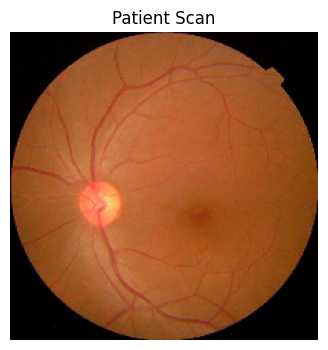


--- 🏥 Diagnosis Result ---
File: 002c21358ce6.png
Sickness Score:      0.71%
Decision Threshold:  39.00%
FINAL RESULT:        ✅ HEALTHY



(np.float32(0.007092595), '✅ HEALTHY')

In [ ]:
# ... (Your imports and definitions) ...

# Load the model with the custom object dictionary
print("Loading model...")

# ⚠️ CRITICAL CHANGE HERE:
my_model = load_model(
    MODEL_PATH,
    custom_objects={'focal_loss_fixed': focal_loss()}
)

# Now test it
test_image_path = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/colored_images/No_DR/002c21358ce6.png' # Update path
diagnose_eye(test_image_path, my_model, OPTIMAL_THRESHOLD)

In [ ]:
from sklearn.metrics import classification_report

# 1. Set the optimal threshold you found
# (Update this if your previous step gave a different number)
threshold = 0.39

# 2. Check if variables exist (Safety check for Colab)
if 'y_pred_sick_prob' not in locals() or 'y_true_binary' not in locals():
    print("❌ Error: Predictions not found. Please run the 'Predict & Find Threshold' cell above first!")
else:
    # 3. Convert probabilities to final labels (0=Healthy, 1=Sick)
    y_pred_binary = (y_pred_sick_prob > threshold).astype(int)

    # 4. Print the Report
    print("📊 Classification Report (Binary: Healthy vs Sick)")
    print("-" * 60)
    # Target names must match your binary logic (0 is Healthy, 1 is Sick)
    print(classification_report(y_true_binary, y_pred_binary, target_names=['Healthy', 'Sick']))

📊 Classification Report (Binary: Healthy vs Sick)
------------------------------------------------------------
              precision    recall  f1-score   support

     Healthy       0.96      0.95      0.96       361
        Sick       0.95      0.96      0.96       372

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# --- SAFETY CHECK ---
if 'raw_preds_5class' not in locals():
    print("❌ Error: 'raw_preds_5class' not found. Please run the Prediction step first!")
else:
    # 1. Get the raw class predictions (Highest probability wins)
    y_pred_classes = np.argmax(raw_preds_5class, axis=1)

    # 2. Get the true class labels (0-4)
    y_true_classes = test_gen.classes

    # 3. Map the class indices to names CORRECTLY
    # The generator returns a dict like {'Mild': 0, 'No_DR': 2, ...}
    # We must sort the names by their index (0, 1, 2, 3, 4) to match the report rows
    class_indices_map = test_gen.class_indices
    class_labels = [k for k, v in sorted(class_indices_map.items(), key=lambda item: item[1])]

    print(f"✅ Label Order: {class_labels}")

    print("\n📊 Detailed Multiclass Report (5 Stages)")
    print("-" * 60)
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))

✅ Label Order: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

📊 Detailed Multiclass Report (5 Stages)
------------------------------------------------------------
                precision    recall  f1-score   support

          Mild       0.55      0.39      0.46        74
      Moderate       0.66      0.85      0.74       200
         No_DR       0.93      0.97      0.95       361
Proliferate_DR       0.53      0.31      0.39        59
        Severe       0.70      0.18      0.29        39

      accuracy                           0.78       733
     macro avg       0.67      0.54      0.56       733
  weighted avg       0.77      0.78      0.76       733



In [ ]:
#!pip install gradio

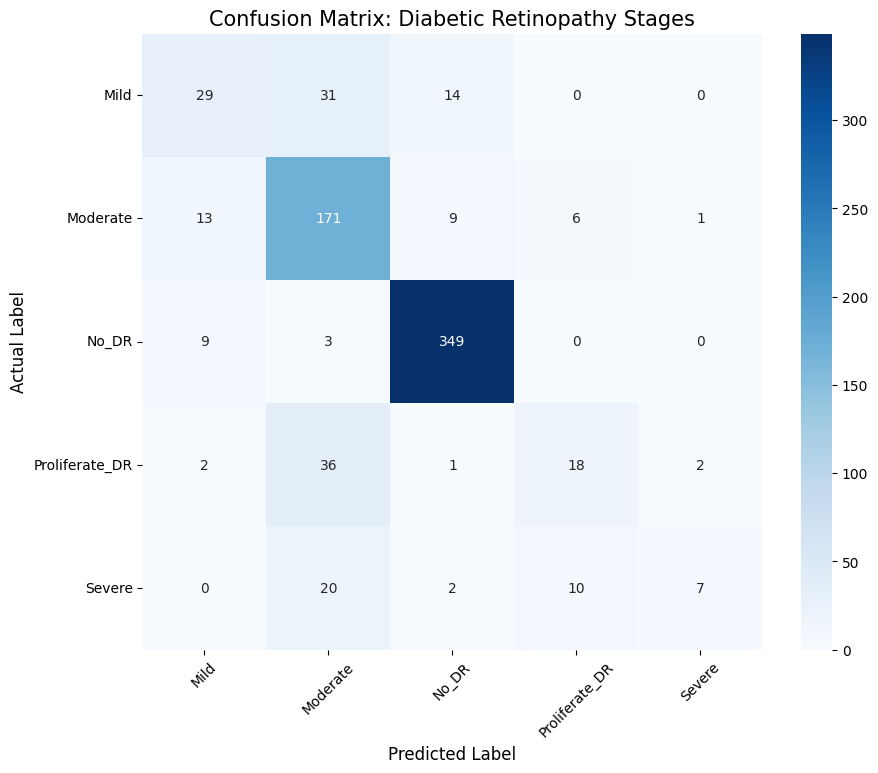


📊 Accuracy Per Class:
Mild           : 39.19%
Moderate       : 85.50%
No_DR          : 96.68%
Proliferate_DR : 30.51%
Severe         : 17.95%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- 1. GET DATA ---
# Ensure you have run the prediction step first!
if 'raw_preds_5class' not in locals():
    print("❌ Error: Predictions not found. Please run the 'Predict' step first.")
else:
    # Convert probabilities to class Index (0-4)
    y_pred_classes = np.argmax(raw_preds_5class, axis=1)

    # Get True Labels (0-4)
    y_true_classes = test_gen.classes

    # --- 2. GET LABELS ---
    # Get class names and sort them by index to ensure correct order
    # Example: ['Mild', 'Moderate', 'No_DR', 'Proliferate', 'Severe']
    class_indices_map = test_gen.class_indices
    class_names = [k for k, v in sorted(class_indices_map.items(), key=lambda item: item[1])]

    # --- 3. GENERATE MATRIX ---
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # --- 4. PLOT ---
    plt.figure(figsize=(10, 8))

    # Create Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)

    plt.title('Confusion Matrix: Diabetic Retinopathy Stages', fontsize=15)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # --- 5. PRINT ACCURACY PER CLASS ---
    # This helps you see which specific disease stage is the hardest
    print("\n📊 Accuracy Per Class:")
    cm_diag = cm.diagonal()
    cm_sum = cm.sum(axis=1)

    for i, name in enumerate(class_names):
        acc = cm_diag[i] / cm_sum[i]
        print(f"{name:15s}: {acc:.2%}")

In [ ]:
import gradio as gr
import tensorflow as tf
import cv2
import numpy as np
import os
from google.colab import drive
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# --- 1. ROBUST PATH SELECTION ---
# Check local runtime first (Fastest), then Drive
path_local = '/content/dr_3000/best_hybrid_phase2_final.keras'
path_drive = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/best_hybrid_phase2_final.keras'

print("🔍 Searching for model...")

if os.path.exists(path_local):
    MODEL_PATH = path_local
    print(f"✅ Found model locally: {MODEL_PATH}")
elif os.path.exists(path_drive):
    MODEL_PATH = path_drive
    print(f"✅ Found model in Drive: {MODEL_PATH}")
else:
    # Try mounting if not found
    if not os.path.exists('/content/drive'):
        print("🔌 Mounting Google Drive...")
        drive.mount('/content/drive')

    if os.path.exists(path_drive):
        MODEL_PATH = path_drive
        print(f"✅ Found model in Drive: {MODEL_PATH}")
    else:
        raise FileNotFoundError("❌ Cannot find model! Please check your file paths.")

# --- 2. CONFIGURATION ---
OPTIMAL_THRESHOLD = 0.39
HEALTHY_INDEX = 2

# ⚠️ LABELS MUST MATCH YOUR TRAINING ORDER (Alphabetical)
# 0: Mild, 1: Moderate, 2: No_DR, 3: Proliferate, 4: Severe
CLASS_LABELS = {
    0: "Mild DR",
    1: "Moderate DR",
    2: "No_DR (Healthy)",
    3: "Proliferate DR",
    4: "Severe DR"
}

# --- 3. CUSTOM LOSS & PREPROCESSING ---
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        loss = -y_true * (tf.pow((1 - y_pred), gamma)) * tf.math.log(y_pred)
        return tf.reduce_sum(loss, axis=-1)
    return focal_loss_fixed

def apply_clahe(img):
    img_uint8 = img.astype('uint8')
    lab = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return preprocess_input(final_img.astype(np.float32))

# --- 4. LOAD MODEL ---
print("🔄 Loading Model...")
model = load_model(MODEL_PATH, custom_objects={'focal_loss_fixed': focal_loss()})
print("✅ Model Loaded Successfully!")

# --- 5. UPDATED PREDICTION LOGIC ---
def predict_eye(image):
    if image is None: return "No Image", {}

    # Preprocessing
    img_resized = cv2.resize(image, (300, 300))
    processed_img = apply_clahe(img_resized)
    input_batch = np.expand_dims(processed_img, axis=0)

    # Raw Predictions (5 values)
    preds = model.predict(input_batch, verbose=0)[0]

    # 1. Calculate General "Sickness" Probability
    healthy_prob = float(preds[HEALTHY_INDEX])
    sick_prob = 1.0 - healthy_prob

    # 2. Build Dictionary for the Bar Chart (Show all 5 classes)
    confidences = {CLASS_LABELS[i]: float(preds[i]) for i in range(5)}

    # 3. Determine Final Diagnosis Label
    if sick_prob > OPTIMAL_THRESHOLD:
        # User is SICK. Now find out WHICH sickness.
        # We look for the max score among the sick classes (exclude index 2)
        sick_classes = preds.copy()
        sick_classes[HEALTHY_INDEX] = -1 # Ignore healthy index for this check

        worst_stage_index = np.argmax(sick_classes)
        stage_name = CLASS_LABELS[worst_stage_index]

        diagnosis = f"⚠️ POSITIVE: {stage_name}"
    else:
        diagnosis = "✅ NEGATIVE: Healthy (No DR)"

    return diagnosis, confidences

# --- 6. LAUNCH ---
interface = gr.Interface(
    fn=predict_eye,
    inputs=gr.Image(label="Upload Retinal Scan"),
    outputs=[
        gr.Textbox(label="Final Diagnosis"),
        gr.Label(num_top_classes=5, label="Detailed Confidence Scores") # Shows all 5
    ],
    title="Diabetic Retinopathy AI Diagnostician",
    description=f"Model checks for 5 stages of Diabetic Retinopathy. \nSick Threshold: {OPTIMAL_THRESHOLD}",
    theme="default"
)

print("🚀 Launching App...")
interface.launch(share=True, debug=True)

🔍 Searching for model...
✅ Found model in Drive: /content/drive/MyDrive/Colab Notebooks/Diabetic Retinopathy/dr_3000/best_hybrid_phase2_final.keras
🔄 Loading Model...
✅ Model Loaded Successfully!
🚀 Launching App...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d72a77d112af137abd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
